## Introduction: 

This report presents the results of a sentiment analysis conducted on a sample dataset received from kaggle.com website. The dataset showed the comments by user on twiter on sport analysis. I will be domonstrating how the data would be cleaned, pre-processed and ready for sentiment analysis using NLTK Python library. The comment column would be tokenized and a sentiment analysis would be performed to gain further insights.



## Data Preprocessing

In [110]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from string import punctuation 
from nltk.tokenize import word_tokenize

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
        
df = pd.read_csv('twitter_data.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olanr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\olanr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [111]:
df.head()

,twitter_link,text,date,likes,comments
0,https://twitter.com/ActionBitters/status/17563...,"Final AFCON Action, Predict the final score be...","Feb 10, 2024 · 5:17 PM UTC",26,48
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue l'objectif. #mohammedsan...,"Feb 10, 2024 · 10:30 AM UTC",630,5
2,https://twitter.com/DejiAdesogan/status/175628...,"""Captain @Ahmedmusa718 is special & important...","Feb 10, 2024 · 11:49 AM UTC",891,14
3,https://twitter.com/ssozinha_/status/175633760...,If you don’t know what’s happening in DR Congo...,"Feb 10, 2024 · 3:21 PM UTC",32,0
4,https://twitter.com/infinixuganda/status/17562...,It’s the FINALS😍 Predict the correct score bef...,"Feb 10, 2024 · 6:23 AM UTC",166,257


In [112]:
df.shape

(100, 5)

In [113]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   twitter_link  100 non-null    object
 1   text          100 non-null    object
 2   date          100 non-null    object
 3   likes         100 non-null    int64 
 4   comments      100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [114]:
# Clean Data

# Drop rows with missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()
# Remove unnessary Characters
def remove_unnecessary_characters(text):
    text = re.sub(r'@', '', str(text))
    text = re.sub(r'<.*?#>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['text'] = df['text'].apply(remove_unnecessary_characters)

df.head()

,twitter_link,text,date,likes,comments
0,https://twitter.com/ActionBitters/status/17563...,Final AFCON Action Predict the final score bet...,"Feb 10, 2024 · 5:17 PM UTC",26,48
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue lobjectif mohammedsanogo...,"Feb 10, 2024 · 10:30 AM UTC",630,5
2,https://twitter.com/DejiAdesogan/status/175628...,Captain Ahmedmusa718 is special important to t...,"Feb 10, 2024 · 11:49 AM UTC",891,14
3,https://twitter.com/ssozinha_/status/175633760...,If you dont know whats happening in DR Congo a...,"Feb 10, 2024 · 3:21 PM UTC",32,0
4,https://twitter.com/infinixuganda/status/17562...,Its the FINALS Predict the correct score befor...,"Feb 10, 2024 · 6:23 AM UTC",166,257


##  Model Implementation

In [115]:
# Tokenizaton 

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)
df.head()

,twitter_link,text,date,likes,comments,tokens
0,https://twitter.com/ActionBitters/status/17563...,Final AFCON Action Predict the final score bet...,"Feb 10, 2024 · 5:17 PM UTC",26,48,"[Final, AFCON, Action, Predict, the, final, sc..."
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue lobjectif mohammedsanogo...,"Feb 10, 2024 · 10:30 AM UTC",630,5,"[Ne, perdons, pas, de, vue, lobjectif, mohamme..."
2,https://twitter.com/DejiAdesogan/status/175628...,Captain Ahmedmusa718 is special important to t...,"Feb 10, 2024 · 11:49 AM UTC",891,14,"[Captain, Ahmedmusa718, is, special, important..."
3,https://twitter.com/ssozinha_/status/175633760...,If you dont know whats happening in DR Congo a...,"Feb 10, 2024 · 3:21 PM UTC",32,0,"[If, you, dont, know, whats, happening, in, DR..."
4,https://twitter.com/infinixuganda/status/17562...,Its the FINALS Predict the correct score befor...,"Feb 10, 2024 · 6:23 AM UTC",166,257,"[Its, the, FINALS, Predict, the, correct, scor..."


In [116]:
# Data Normalization
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

df.head()

,twitter_link,text,date,likes,comments,tokens,normalized_text
0,https://twitter.com/ActionBitters/status/17563...,Final AFCON Action Predict the final score bet...,"Feb 10, 2024 · 5:17 PM UTC",26,48,"[Final, AFCON, Action, Predict, the, final, sc...",final afcon action predict the final score bet...
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue lobjectif mohammedsanogo...,"Feb 10, 2024 · 10:30 AM UTC",630,5,"[Ne, perdons, pas, de, vue, lobjectif, mohamme...",ne perdons pas de vue lobjectif mohammedsanogo...
2,https://twitter.com/DejiAdesogan/status/175628...,Captain Ahmedmusa718 is special important to t...,"Feb 10, 2024 · 11:49 AM UTC",891,14,"[Captain, Ahmedmusa718, is, special, important...",captain ahmedmusa718 is special important to t...
3,https://twitter.com/ssozinha_/status/175633760...,If you dont know whats happening in DR Congo a...,"Feb 10, 2024 · 3:21 PM UTC",32,0,"[If, you, dont, know, whats, happening, in, DR...",if you dont know whats happening in dr congo a...
4,https://twitter.com/infinixuganda/status/17562...,Its the FINALS Predict the correct score befor...,"Feb 10, 2024 · 6:23 AM UTC",166,257,"[Its, the, FINALS, Predict, the, correct, scor...",its the finals predict the correct score befor...


In [117]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

df.head()

,twitter_link,text,date,likes,comments,tokens,normalized_text,text_without_stopwords
0,https://twitter.com/ActionBitters/status/17563...,Final AFCON Action Predict the final score bet...,"Feb 10, 2024 · 5:17 PM UTC",26,48,"[Final, AFCON, Action, Predict, the, final, sc...",final afcon action predict the final score bet...,Final AFCON Action Predict final score Nigeria...
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue lobjectif mohammedsanogo...,"Feb 10, 2024 · 10:30 AM UTC",630,5,"[Ne, perdons, pas, de, vue, lobjectif, mohamme...",ne perdons pas de vue lobjectif mohammedsanogo...,Ne perdons pas de vue lobjectif mohammedsanogo...
2,https://twitter.com/DejiAdesogan/status/175628...,Captain Ahmedmusa718 is special important to t...,"Feb 10, 2024 · 11:49 AM UTC",891,14,"[Captain, Ahmedmusa718, is, special, important...",captain ahmedmusa718 is special important to t...,Captain Ahmedmusa718 special important team as...
3,https://twitter.com/ssozinha_/status/175633760...,If you dont know whats happening in DR Congo a...,"Feb 10, 2024 · 3:21 PM UTC",32,0,"[If, you, dont, know, whats, happening, in, DR...",if you dont know whats happening in dr congo a...,dont know whats happening DR Congo national pl...
4,https://twitter.com/infinixuganda/status/17562...,Its the FINALS Predict the correct score befor...,"Feb 10, 2024 · 6:23 AM UTC",166,257,"[Its, the, FINALS, Predict, the, correct, scor...",its the finals predict the correct score befor...,FINALS Predict correct score kickoff tomorrows...


In [118]:

def sentiment_analyzer(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    sentiment = sentiment_scores['compound'] 
    
    #Print Sentiment Scores
    print(sentiment_scores)
    
    tokens = nltk.word_tokenize(text)
    wordScores = []
    for token in tokens:
        wordScore = sid.polarity_scores(token)
        wordScores.append((token, wordScore))
    if sentiment >= 0.05:
        return 'Positive'
    elif sentiment <=-0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['text'].apply(sentiment_analyzer)

{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.7964}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.9001}
{'neg': 0.049, 'neu': 0.879, 'pos': 0.072, 'compound': 0.1779}
{'neg': 0.038, 'neu': 0.701, 'pos': 0.261, 'compound': 0.8779}
{'neg': 0.069, 'neu': 0.713, 'pos': 0.218, 'compound': 0.7717}
{'neg': 0.053, 'neu': 0.91, 'pos': 0.036, 'compound': -0.2342}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.8625}
{'neg': 0.033, 'neu': 0.831, 'pos': 0.136, 'compound': 0.9721}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.9555}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9153}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.4404}
{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.743}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos

In [119]:
df.head(20)

,twitter_link,text,date,likes,comments,tokens,normalized_text,text_without_stopwords,sentiment
0,https://twitter.com/ActionBitters/status/17563...,Final AFCON Action Predict the final score bet...,"Feb 10, 2024 · 5:17 PM UTC",26,48,"[Final, AFCON, Action, Predict, the, final, sc...",final afcon action predict the final score bet...,Final AFCON Action Predict final score Nigeria...,Positive
1,https://twitter.com/MohammedSanogo/status/1756...,Ne perdons pas de vue lobjectif mohammedsanogo...,"Feb 10, 2024 · 10:30 AM UTC",630,5,"[Ne, perdons, pas, de, vue, lobjectif, mohamme...",ne perdons pas de vue lobjectif mohammedsanogo...,Ne perdons pas de vue lobjectif mohammedsanogo...,Neutral
2,https://twitter.com/DejiAdesogan/status/175628...,Captain Ahmedmusa718 is special important to t...,"Feb 10, 2024 · 11:49 AM UTC",891,14,"[Captain, Ahmedmusa718, is, special, important...",captain ahmedmusa718 is special important to t...,Captain Ahmedmusa718 special important team as...,Positive
3,https://twitter.com/ssozinha_/status/175633760...,If you dont know whats happening in DR Congo a...,"Feb 10, 2024 · 3:21 PM UTC",32,0,"[If, you, dont, know, whats, happening, in, DR...",if you dont know whats happening in dr congo a...,dont know whats happening DR Congo national pl...,Positive
4,https://twitter.com/infinixuganda/status/17562...,Its the FINALS Predict the correct score befor...,"Feb 10, 2024 · 6:23 AM UTC",166,257,"[Its, the, FINALS, Predict, the, correct, scor...",its the finals predict the correct score befor...,FINALS Predict correct score kickoff tomorrows...,Positive
5,https://twitter.com/NigeriaStories/status/1756...,The last time Nigeria won AFCON was 2013 Niger...,"Feb 10, 2024 · 1:25 PM UTC",4801,50,"[The, last, time, Nigeria, won, AFCON, was, 20...",the last time nigeria won afcon was 2013 niger...,last time Nigeria AFCON 2013 Nigeria defeated ...,Positive
6,https://twitter.com/StanleyOkolie9/status/1756...,At the group stages I said to myself if by som...,"Feb 10, 2024 · 7:10 PM UTC",0,0,"[At, the, group, stages, I, said, to, myself, ...",at the group stages i said to myself if by som...,group stages said chance make finals trophy co...,Negative
7,https://twitter.com/KelechiAFC/status/17562801...,Local Man vibes last night at the Super Eagles...,"Feb 10, 2024 · 11:33 AM UTC",92,6,"[Local, Man, vibes, last, night, at, the, Supe...",local man vibes last night at the super eagles...,Local Man vibes last night Super Eagles camp B...,Positive
8,https://twitter.com/osasuo/status/175604647295...,This is what a person once very highup in then...,"Feb 9, 2024 · 8:04 PM UTC",587,74,"[This, is, what, a, person, once, very, highup...",this is what a person once very highup in then...,person highup thenff sent evening publish word...,Positive
9,https://twitter.com/osasuo/status/175604910681...,And he has more to say Questions must be asked...,"Feb 9, 2024 · 8:15 PM UTC",239,7,"[And, he, has, more, to, say, Questions, must,...",and he has more to say questions must be asked...,say Questions must asked thenff intend spend 7...,Positive


In [120]:
#Count the sentiments
df['sentiment'].value_counts()

sentiment
Positive    58
Neutral     29
Negative    13
Name: count, dtype: int64

## Visualization and Analysis

(-1.1491413673106943,
 1.1814038054856166,
 -1.1979727027198843,
 1.1733952589988892)

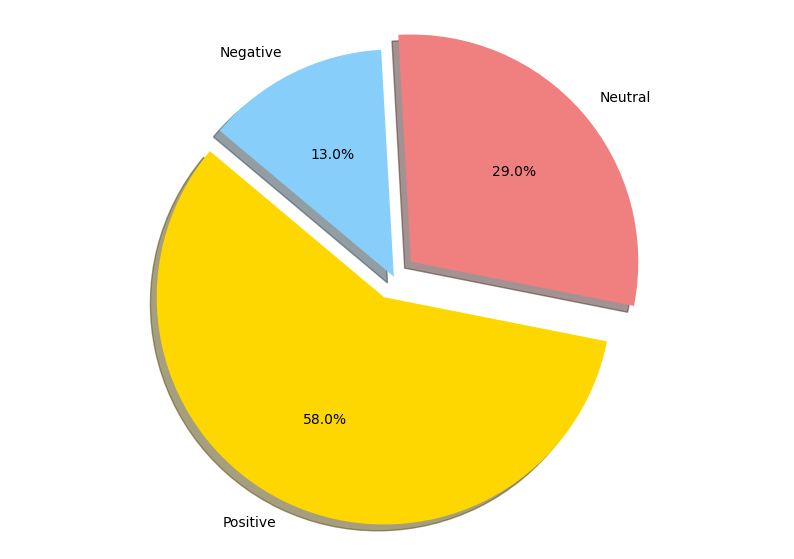

In [121]:
# Plot the pie chart

#Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()

#Set the parameters and plot the chart on pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0)  # slice the pie chart for more emphasis

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ensure Equal aspect ratio.
plt.axis('equal')

## Result Interpretation

The analysis indicates that the majority of sentiments are positive, with 58% of the sentiments expressing satisfaction or approval. A significant portion of the sentiments are neutral (29%), indicating a balanced or indifferent reaction. Negative sentiments constitute 13% of the total, suggesting that a minority of individuals have had unfavorable experiences or views. Overall, the sentiment leans strongly towards positive feedback, which is encouraging. However, the presence of negative sentiments highlights areas for potential improvement.

## Reflection on the Overall Process


### The sentiment analysis process involved several key steps:

<b>1. Data Collection and Preparation:</b> Gathering relevant text data and ensuring it was in a clean, analyzable format. <br><br>
<b>2. Sentiment Categorization:</b> Using tools such as NLTK to categorize each piece of text as positive, neutral, or negative. <br><br>
<b>3. Data Analysis:</b> Calculating the frequency and percentage of each sentiment category. <br><br>
<b>4. Visualization and Interpretation:</b> Plotting the sentiment distribution in a pie chart and interpreting the results.
<br><br>
Throughout this process, the importance of data quality and preprocessing became evident. Cleaning the text to remove duplicates and irrelevant characters was crucial for accurate sentiment analysis. The use of reliable sentiment analysis tools provided valuable insights, although it is important to note that automated tools can sometimes misinterpret context, particularly in nuanced or sarcastic expressions. <br><br>

The visualization step, using pie charts, effectively communicated the sentiment distribution, making it easier to understand and present the findings. The overall process demonstrated the power of sentiment analysis in transforming qualitative feedback into quantitative data that can drive informed decision-making.


### Conclusion

The analysis shows a predominantly positive sentiment among the subjects, reflecting overall satisfaction. However, the presence of neutral and negative sentiments indicates areas where improvements can be made. This process underscores the value of sentiment analysis as a tool for gaining actionable insights from textual data, enabling businesses and organizations to better understand and respond to their audience's needs and opinions.